# Model validation currents

Note: this notebook requires the model output data

In [26]:
import modelskill as ms
import matplotlib.pyplot as plt
import helper as h

In [ ]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"    
# mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
mr_fn = f"{mr_fldr}Area.dfsu"

In [28]:
# Load observation data
ulist, vlist = h.get_u_v_point_obs()

In [29]:
# Load MIKE21 simulation data
mr_u = ms.DfsuModelResult(mr_fn, name="MIKE21", item=1)
mr_v = ms.DfsuModelResult(mr_fn, name="MIKE21", item=2)
mr_u

<DfsuModelResult>: MIKE21
Time: 2014-01-01 00:00:00 - 2023-12-31 23:00:00
Quantity: u velocity component [m/s]

In [30]:
cmps = []
for o in ulist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_u))
    except Exception as e:
        print(e)
cc_u = ms.ComparerCollection(cmps)

In [ ]:
cmps = []
for o in vlist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_v))
    except Exception as e:
        print(e)
cc_v = ms.ComparerCollection(cmps)

## Skill tables

In [32]:
# Print statistics for the u-component
cc_u.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
Drogden,12817,0.021,0.083,0.081,0.062,0.924,0.457,0.840
Flinten7,33252,-0.004,0.140,0.140,0.098,0.868,0.595,0.751
Helsingborg,13895,-0.025,0.097,0.093,0.065,0.809,0.916,0.499


In [33]:
# Print statistics for the v-component
cc_v.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
Drogden,12817,0.022,0.095,0.092,0.072,0.944,0.397,0.881
Flinten7,33252,0.045,0.229,0.224,0.161,0.882,0.576,0.764
Helsingborg,13895,0.044,0.123,0.115,0.093,0.872,0.611,0.720


## Scatter plots

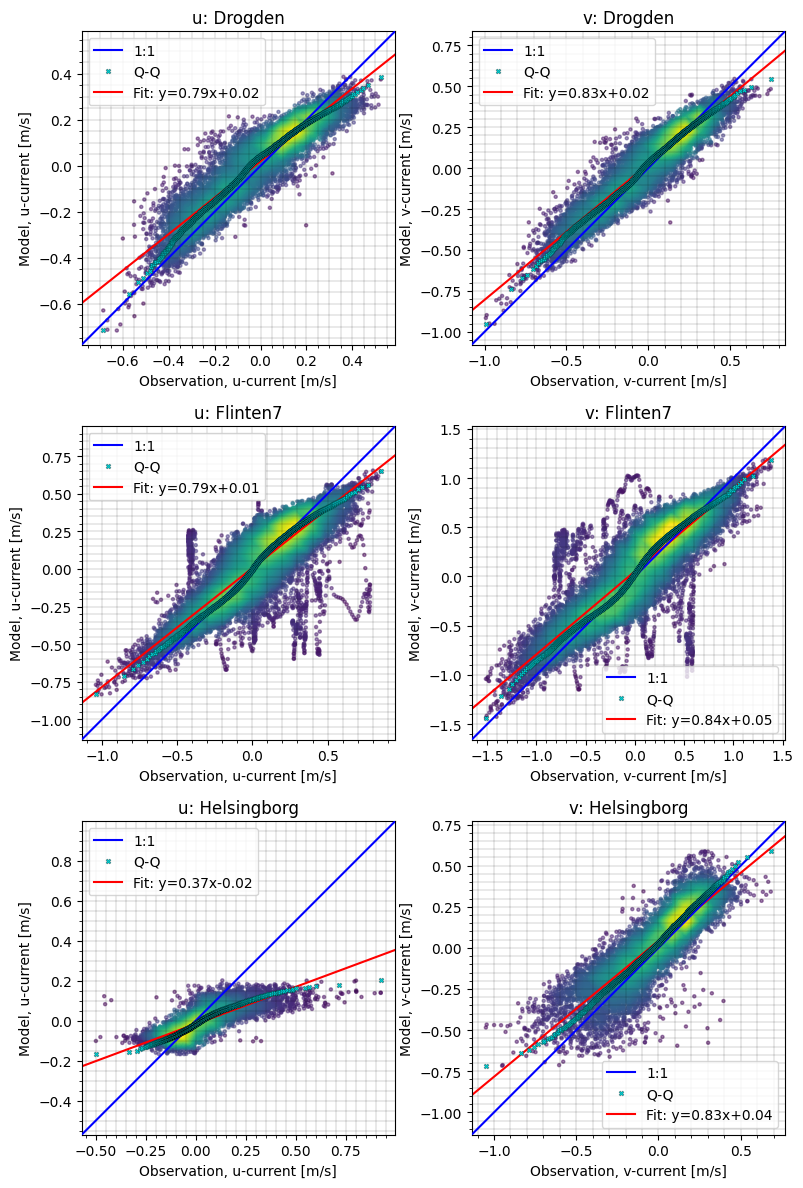

In [34]:
fig, axs = plt.subplots(len(cc_u), 2, figsize=(8,4*len(cc_u)))
axs = axs.flatten()
for i in range(len(cc_u)):
    cc_u[i].sel().plot.scatter(ax=axs[i*2], title=f"u: {cc_u[i].name}",bins=20)
    cc_v[i].sel().plot.scatter(ax=axs[i*2+1], title=f"v: {cc_v[i].name}",bins=20)
plt.tight_layout()
plt.show()

## Timeseries

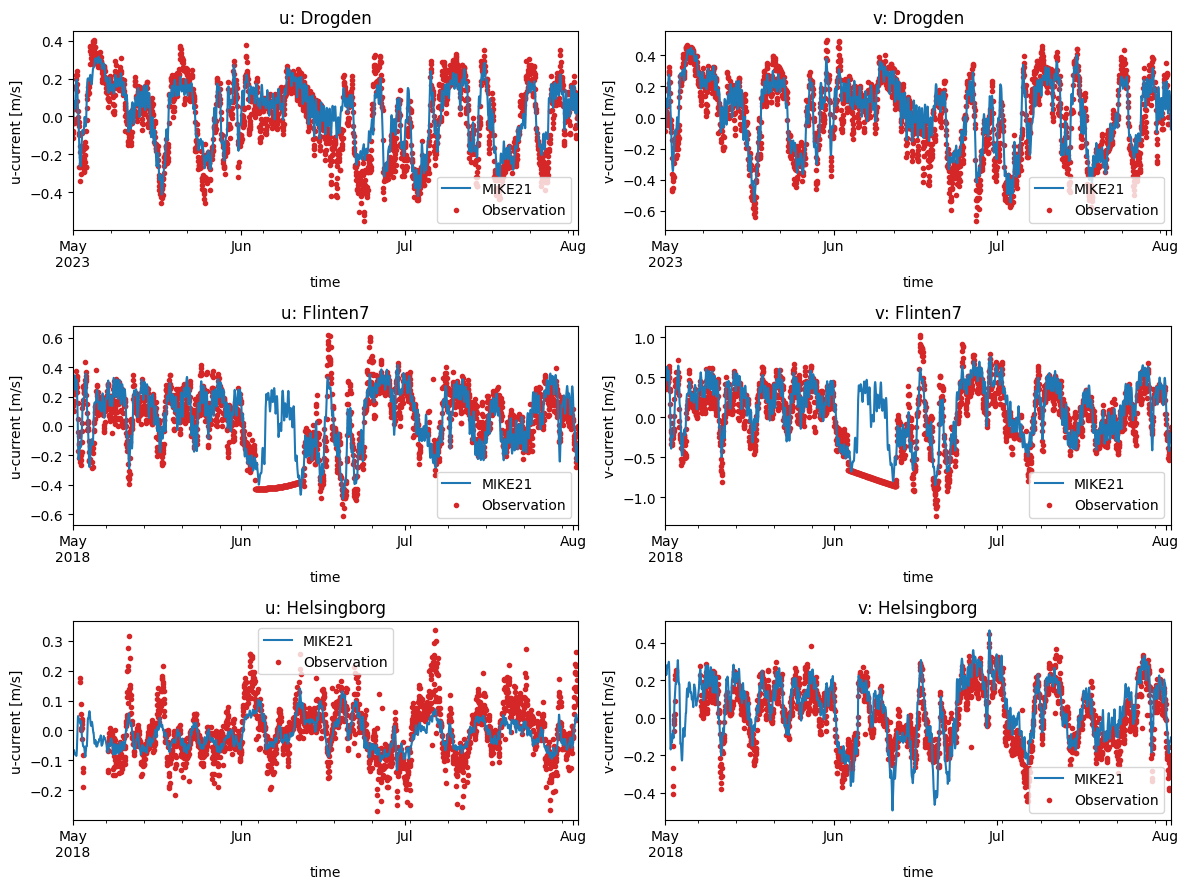

In [35]:
# Look at a timeseries for a qualitative comparison between observations and model
yr_s = ["2023-05-01", "2018-05-01", "2018-05-01"] if not "sample" in mr_fldr else [None]*3
yr = ["2023-08-01","2018-08-01", "2018-08-01"] if not "sample" in mr_fldr else [None]*3
fig, axs = plt.subplots(len(cc_u), 2, figsize=(12,3*len(cc_u)))
axs = axs.flatten()
for i in range(len(cc_u)):
    cc_u[i].sel(time=slice(yr_s[i],yr[i])).plot.timeseries(ax=axs[i*2], title=f"u: {cc_u[i].name}")
    cc_v[i].sel(time=slice(yr_s[i],yr[i])).plot.timeseries(ax=axs[i*2+1], title=f"v: {cc_v[i].name}")
plt.tight_layout()
plt.show()

**The following analysis holds for the *full output data*, NOT the one week sample:**

The plot shows that the MIKE21 model is close to the Drogden data, and the same goes for Flinten7. However, there are some artefacts in the observation data, e.g. in June, which is also reflected in the scatter plot. This is a main source of error when comparing the model to the data. 
In the Helsingborg station, the model is under-predicting the u-component of the current. The reason for this could be local conditions not captured in the model. 